In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')


# Import Imbalance Data

In [28]:
imb_df = pd.read_csv('imb_data.csv', parse_dates=[['YYYYMMDD','snapTime']], index_col=0)

In [29]:
imb_df.head()

,es,spx,type,dBuy,dSell,dTotal,dPct,sBuy,sSell,sTotal,...,snp_pPct,dow_dBuy,dow_dSell,dow_dPct,dow_sBuy,dow_sSell,dow_sPct,dow_pBuy,dow_pSell,dow_pPct
YYYYMMDD_snapTime,,,,,,,,,,,,,,,,,,,,,
2018-04-02 14:10:00,NaN,NaN,NYSE-PM,161.0,-191.0,-30.0,-54,36,65,101,...,-61,21.0,21.0,51,2,3,-60,6,7,-55
2018-04-02 14:11:00,NaN,NaN,NYSE-PM,161.0,-191.0,-30.0,-54,36,65,101,...,-61,21.0,21.0,51,2,3,-60,6,7,-55
2018-04-02 14:12:00,NaN,NaN,NYSE-PM,161.0,-191.0,-30.0,-54,36,65,101,...,-61,21.0,21.0,51,2,3,-60,6,7,-55
2018-04-02 14:13:00,NaN,NaN,NYSE-PM,392.0,-458.0,-66.0,-54,78,125,203,...,-59,81.0,64.0,56,5,9,-64,28,14,67
2018-04-02 14:14:00,NaN,NaN,NYSE-PM,392.0,-458.0,-66.0,-54,78,125,203,...,-59,81.0,64.0,56,5,9,-64,28,14,67


### Examine dTotal Range

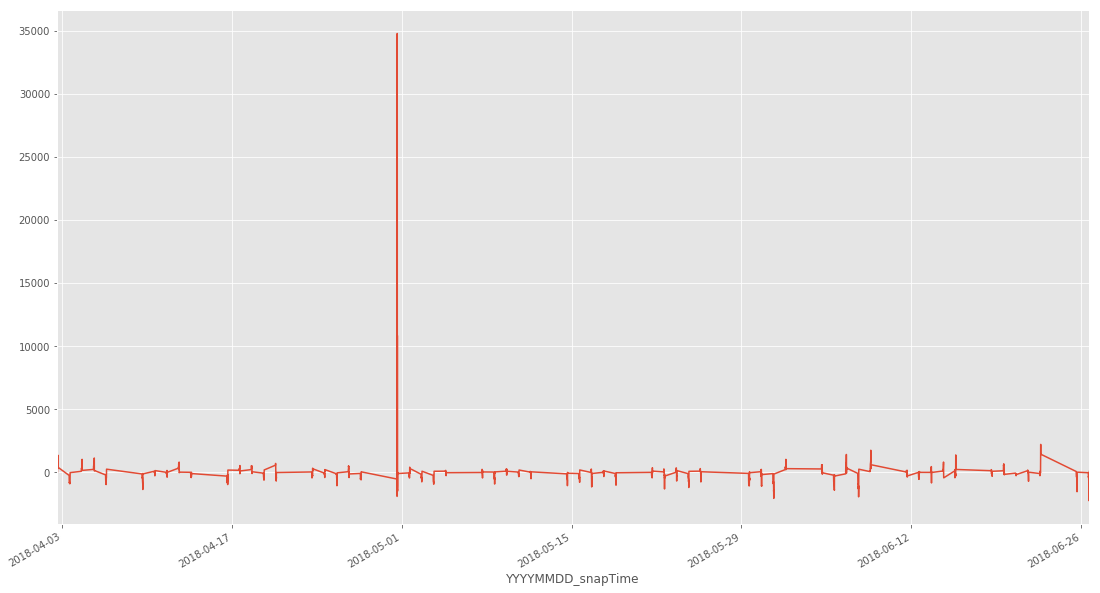

In [46]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
imb_df['dTotal'].plot()

C:\Users\b.karjoo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  This is separate from the ipykernel package so we can avoid doing imports until


{'boxes': [<matplotlib.lines.Line2D at 0x1ae30278>],
 'caps': [<matplotlib.lines.Line2D at 0x1ae30908>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ae26320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1ae30f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1ae30320>,
  <matplotlib.lines.Line2D at 0x1ae305c0>]}

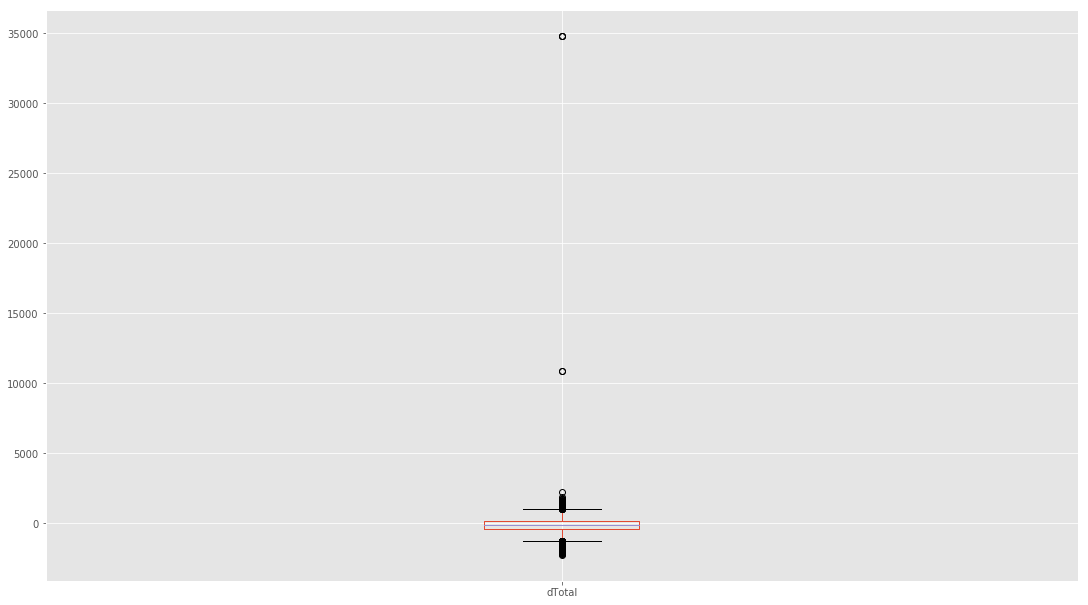

In [45]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
imb_df.boxplot(column='dTotal')

### Filter outside of .9995 quantile

In [33]:
# filter out the outliers
q = imb_df['dTotal'].quantile(0.9995)
filtered_df = imb_df[imb_df['dTotal'] < q]

C:\Users\b.karjoo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  This is separate from the ipykernel package so we can avoid doing imports until


{'boxes': [<matplotlib.lines.Line2D at 0x18351b00>],
 'caps': [<matplotlib.lines.Line2D at 0x183421d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18342ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18342860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18351ba8>,
  <matplotlib.lines.Line2D at 0x18351e48>]}

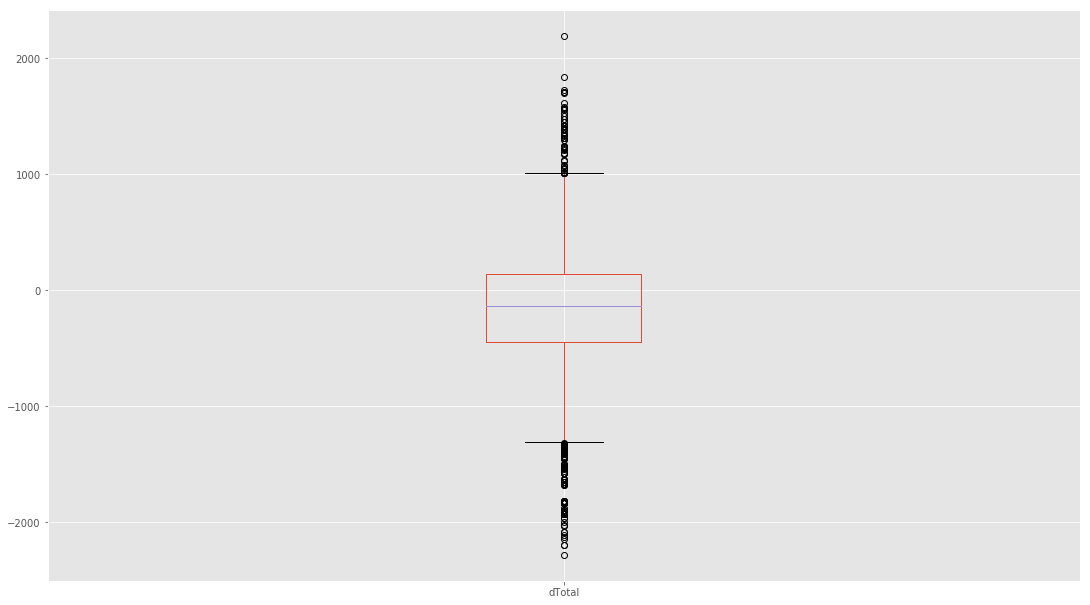

In [44]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
filtered_df.boxplot(column='dTotal')

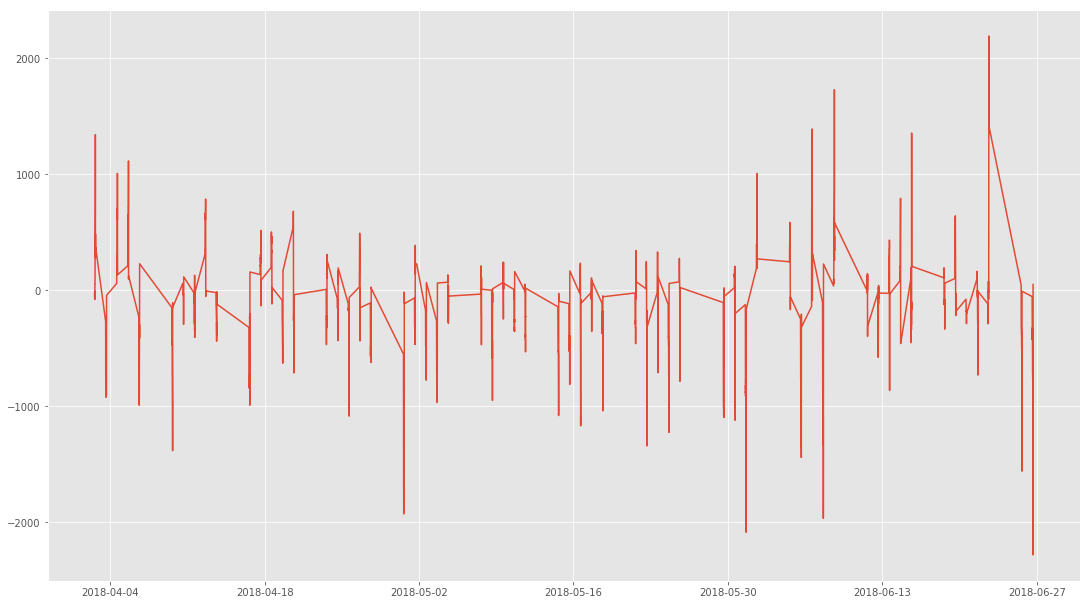

In [43]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(filtered_df['dTotal'])

# Load SPY Minute Data

In [36]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is 64E4-183A

 Directory of C:\Users\b.karjoo\myfiles2\active\test Will's imblanace data

06/29/2018  06:22 PM    <DIR>          .
06/29/2018  06:22 PM    <DIR>          ..
06/28/2018  12:41 PM    <DIR>          .ipynb_checkpoints
06/29/2018  06:22 PM           260,600 Imbalance Data.ipynb
06/28/2018  12:43 PM         1,064,356 imb_data.csv
06/27/2018  06:01 PM         1,172,579 Market Imbalance Historical Data.xlsx
06/29/2018  11:45 AM         4,961,315 SPY_1m.csv
06/29/2018  06:22 PM            10,135 test2png.png
               5 File(s)      7,468,985 bytes
               3 Dir(s)  65,199,861,760 bytes free


In [37]:
import pandas as pd
#spy_df = pd.read_csv('SPY_1m.csv', index_col=0, header=None)
spy_df = pd.read_csv('SPY_1m.csv', parse_dates=[[0,1]], index_col=0, header=None)

In [38]:
spy_df.columns = ['Open','High','Low','Close','Volume']

In [39]:
spy_df.count()
#spy_df.sort_index(inplace=True)

Open      96612
High      96612
Low       96612
Close     96612
Volume    96612
dtype: int64

In [40]:
spy_df.tail()

,Open,High,Low,Close,Volume
0_1,,,,,
2018-06-28 19:33:00,271.05,271.05,271.05,271.05,100
2018-06-28 19:37:00,271.15,271.15,271.15,271.15,100
2018-06-28 19:40:00,271.18,271.18,271.18,271.18,100
2018-06-28 19:41:00,271.19,271.23,271.19,271.23,400
2018-06-28 19:42:00,271.24,271.24,271.24,271.24,100


### Examine plot of SPY Data

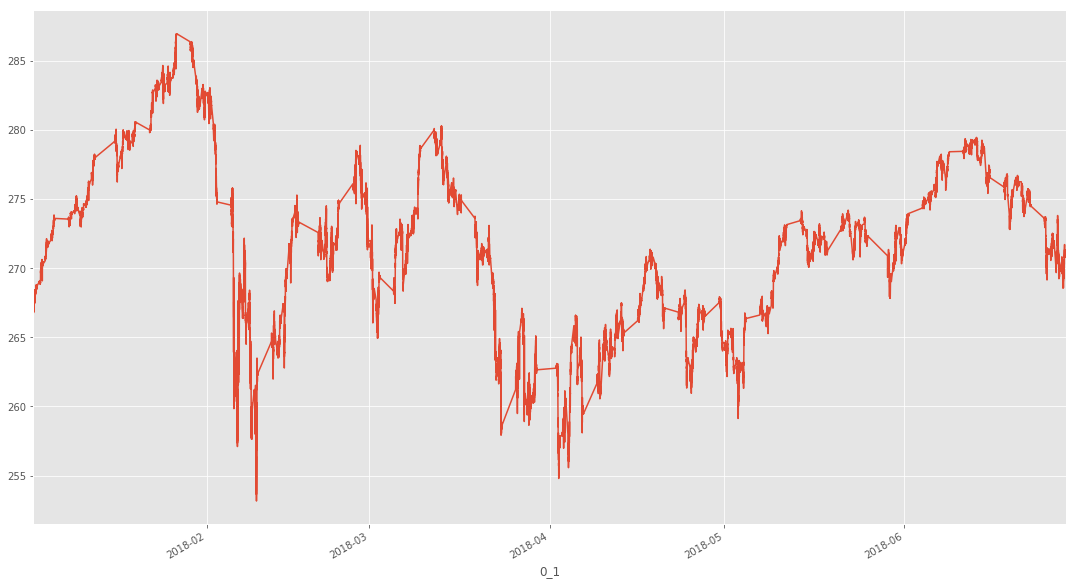

In [57]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
spy_df['Close'].plot()


# Merge Imbalances with Minute Data on Timestamp

In [48]:
# merge the dataframes
merged_dfs = pd.concat([spy_df, imb_df], axis=1, join_axes=[imb_df.index])

In [49]:
merged_dfs.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'es', u'spx', u'type',
       u'dBuy', u'dSell', u'dTotal', u'dPct', u'sBuy', u'sSell', u'sTotal',
       u'sPct', u'pBuy', u'pSell', u'pPct', u'snp_dBuy', u'snp_dSell',
       u'snp_dPct', u'snp_sBuy', u'snp_sSell', u'snp_sPct', u'snp_pBuy',
       u'snp_pSell', u'snp_pPct', u'dow_dBuy', u'dow_dSell', u'dow_dPct',
       u'dow_sBuy', u'dow_sSell', u'dow_sPct', u'dow_pBuy', u'dow_pSell',
       u'dow_pPct'],
      dtype='object')

In [58]:
merged_dfs.head()

,Open,High,Low,Close,Volume,es,spx,type,dBuy,dSell,...,snp_pPct,dow_dBuy,dow_dSell,dow_dPct,dow_sBuy,dow_sSell,dow_sPct,dow_pBuy,dow_pSell,dow_pPct
YYYYMMDD_snapTime,,,,,,,,,,,,,,,,,,,,,
2018-04-02 14:10:00,255.43,255.45,255.28,255.2800,464046,NaN,NaN,NYSE-PM,161.0,-191.0,...,-61,21.0,21.0,51,2,3,-60,6,7,-55
2018-04-02 14:11:00,255.28,255.33,255.10,255.2701,321189,NaN,NaN,NYSE-PM,161.0,-191.0,...,-61,21.0,21.0,51,2,3,-60,6,7,-55
2018-04-02 14:12:00,255.29,255.49,255.16,255.3400,336119,NaN,NaN,NYSE-PM,161.0,-191.0,...,-61,21.0,21.0,51,2,3,-60,6,7,-55
2018-04-02 14:13:00,255.34,255.39,255.17,255.2800,161116,NaN,NaN,NYSE-PM,392.0,-458.0,...,-59,81.0,64.0,56,5,9,-64,28,14,67
2018-04-02 14:14:00,255.28,255.69,255.23,255.6370,353585,NaN,NaN,NYSE-PM,392.0,-458.0,...,-59,81.0,64.0,56,5,9,-64,28,14,67


# The Strategy

In [50]:
# a structure to store execution data
execution = {
    'quantity':0,
    'symbol':'',
    'price':0.0,
    'date':''
}

# a strcuture to store daily returns for equity curve
daily_returns = {
    'date':'',
    'pnl':0.0
}

In [51]:
import datetime
execution_list = []
daily_returns_list = []
position = 0
previous_close = 0
entry_date = ''
count = 0
DOLLARS_PER_POSITION = 100000
previous_bar_dTotal = 0
DTOTAL_DELTA = 100
dTotal_high_since_entry = 0
dTotal_low_since_entry = 0

for index, row in merged_dfs.iterrows():
    entry_triggered = False
    count += 1
    
    
    
    if (row['dTotal'] > 100 
        and row['dTotal'] < 10000
        and row['dTotal'] > previous_bar_dTotal + DTOTAL_DELTA
        and position == 0
        and index.time()<datetime.time(16)):
        entry_triggered = True
        position = int(DOLLARS_PER_POSITION/row['Close'])
    elif (row['dTotal'] < -100 
        and row['dTotal'] > -10000
        and row['dTotal'] < previous_bar_dTotal - DTOTAL_DELTA
        and position == 0
        and index.time()<datetime.time(16)):      
        entry_triggered = True
        position = int(DOLLARS_PER_POSITION/row['Close'])*-1
        
        
    if entry_triggered:
        previous_execution = row['Close']
        previous_trigger_dTotal = row['dTotal']
        execution_list.append({'Quantity':position,'Symbol':'SPY','Price':row['Close'],'Date':index})
        print 'Close',row['Close'],'dTotal',row['dTotal'],'time',index.time(), 'prev bar dtotal', previous_bar_dTotal
        previous_entry_time = index
        
    if (entry_triggered == False
        and position != 0):
        #check for exits
        exit = False
        
        # conditions that make exit true
        if index.time()==datetime.time(16): exit = True
        if position > 0 and row['dTotal'] < dTotal_high_since_entry: exit = True
        if position < 0 and row['dTotal'] > dTotal_low_since_entry: exit = True
        if index.time() > (previous_entry_time + datetime.timedelta(minutes=3)).time(): exit = True
        
        if exit:
            print 'Close',row['Close'],'dTotal',row['dTotal'],'time',index.time()
            execution_list.append({'Quantity':position*-1,'Symbol':'SPY','Price':row['Close'],'Date':index})
            pnl = (row['Close']-previous_execution)*position
            print 'pnl',pnl,' on ',position,' shares'
            daily_returns_list.append({'Date':index,'pnl':pnl})
            position = 0
            dTotal_high_since_entry = 0
            dTotal_low_since_entry = 0
    
    if position != 0: print index.time(), row['dTotal']
    
    previous_bar_dTotal = row['dTotal']
    if dTotal_high_since_entry < row['dTotal']: dTotal_high_since_entry = row['dTotal']
    if dTotal_low_since_entry > row['dTotal']: dTotal_low_since_entry = row['dTotal']
    




Close 256.17 dTotal 477.0 time 15:13:00 prev bar dtotal 199.0
15:13:00 477.0
15:14:00 477.0
15:15:00 477.0
15:16:00 477.0
Close 256.39 dTotal 477.0 time 15:17:00
pnl 85.8  on  390  shares
Close 255.95 dTotal 687.0 time 15:28:00 prev bar dtotal 477.0
15:28:00 687.0
15:29:00 687.0
15:30:00 687.0
15:31:00 748.0
Close 256.02 dTotal 834.0 time 15:32:00
pnl 27.3  on  390  shares
Close 256.68 dTotal 1340.0 time 15:45:00 prev bar dtotal 870.0
15:45:00 1340.0
Close 257.19 dTotal 1223.0 time 15:46:00
pnl 198.39  on  389  shares
Close 257.53 dTotal 483.0 time 15:59:00 prev bar dtotal 281.0
15:59:00 483.0
Close 257.31 dTotal 377.0 time 16:00:00
pnl -85.36  on  388  shares
Close 258.71 dTotal -270.0 time 14:09:00 prev bar dtotal 377.0
14:09:00 -270.0
14:10:00 -591.0
14:11:00 -591.0
14:12:00 -591.0
Close 258.5 dTotal -591.0 time 14:13:00
pnl 81.06  on  -386  shares
Close 258.3288 dTotal -839.0 time 14:15:00 prev bar dtotal -591.0
14:15:00 -839.0
14:16:00 -839.0
14:17:00 -839.0
14:18:00 -839.0
Close 

14:12:00 -356.0
14:13:00 -540.0
14:14:00 -552.0
Close 266.6936 dTotal -552.0 time 14:15:00
pnl -80.1  on  -375  shares
Close 265.2408 dTotal -552.0 time 14:08:00 prev bar dtotal 14.0
14:08:00 -552.0
Close 265.22 dTotal -552.0 time 14:09:00
pnl 7.84159999998  on  -377  shares
Close 265.22 dTotal -1083.0 time 14:14:00 prev bar dtotal -552.0
14:14:00 -1083.0
14:15:00 -1083.0
14:16:00 -1083.0
14:17:00 -1673.0
Close 265.26 dTotal -1673.0 time 14:18:00
pnl -15.08  on  -377  shares
Close 265.28 dTotal -1835.0 time 14:33:00 prev bar dtotal -1678.0
14:33:00 -1835.0
14:34:00 -1835.0
14:35:00 -1835.0
14:36:00 -1835.0
Close 265.31 dTotal -1835.0 time 14:37:00
pnl -11.28  on  -376  shares
Close 265.16 dTotal -1575.0 time 15:09:00 prev bar dtotal 34781.0
15:09:00 -1575.0
Close 265.25 dTotal -1575.0 time 15:10:00
pnl -33.93  on  -377  shares
Close 264.87 dTotal -1536.0 time 15:24:00 prev bar dtotal 10827.0
15:24:00 -1536.0
Close 264.83 dTotal -1536.0 time 15:25:00
pnl 15.08  on  -377  shares
Close 26

Close 272.389 dTotal 264.0 time 14:41:00 prev bar dtotal 133.0
14:41:00 264.0
14:42:00 264.0
14:43:00 329.0
14:44:00 329.0
Close 272.39 dTotal 329.0 time 14:45:00
pnl 0.366999999991  on  367  shares
Close 272.77 dTotal -705.0 time 15:45:00 prev bar dtotal 15.0
15:45:00 -705.0
Close 272.755 dTotal -698.0 time 15:46:00
pnl 5.49  on  -366  shares
Close 272.8 dTotal -124.0 time 14:11:00 prev bar dtotal 116.0
14:11:00 -124.0
Close 272.84 dTotal -263.0 time 14:12:00
pnl -14.64  on  -366  shares
Close 272.69 dTotal -403.0 time 14:15:00 prev bar dtotal -263.0
14:15:00 -403.0
14:16:00 -403.0
14:17:00 -403.0
14:18:00 -403.0
Close 272.84 dTotal -403.0 time 14:19:00
pnl -54.9  on  -366  shares
Close 272.61 dTotal -657.0 time 15:07:00 prev bar dtotal -483.0
15:07:00 -657.0
15:08:00 -657.0
15:09:00 -657.0
15:10:00 -657.0
Close 272.89 dTotal -657.0 time 15:11:00
pnl -102.48  on  -366  shares
Close 272.72 dTotal -1150.0 time 15:46:00 prev bar dtotal -659.0
15:46:00 -1150.0
15:46:00 -1156.0
Close 272.7

Close 279.07 dTotal 141.0 time 15:45:00 prev bar dtotal -9.0
15:45:00 141.0
Close 279.05 dTotal 142.0 time 15:46:00
pnl -7.15999999999  on  358  shares
Close 278.795 dTotal -315.0 time 15:55:00 prev bar dtotal 117.0
15:55:00 -315.0
15:56:00 -362.0
15:57:00 -390.0
15:58:00 -399.0
Close 278.565 dTotal -119.0 time 15:59:00
pnl 82.34  on  -358  shares
Close 278.88 dTotal -146.0 time 14:08:00 prev bar dtotal -28.0
14:08:00 -146.0
Close 278.84 dTotal -149.0 time 14:09:00
pnl 14.32  on  -358  shares
Close 278.7901 dTotal -362.0 time 14:13:00 prev bar dtotal -194.0
14:13:00 -362.0
14:14:00 -362.0
14:15:00 -362.0
14:16:00 -362.0
Close 278.815 dTotal -362.0 time 14:17:00
pnl -8.9142  on  -358  shares
Close 278.49 dTotal 212.0 time 14:36:00 prev bar dtotal 19.0
14:36:00 212.0
14:37:00 212.0
14:38:00 276.0
14:39:00 276.0
Close 278.74 dTotal 276.0 time 14:40:00
pnl 89.75  on  359  shares
Close 278.01 dTotal -866.0 time 15:55:00 prev bar dtotal -24.0
15:55:00 -866.0
Close 278.03 dTotal -637.0 time 1

### Equity Curve

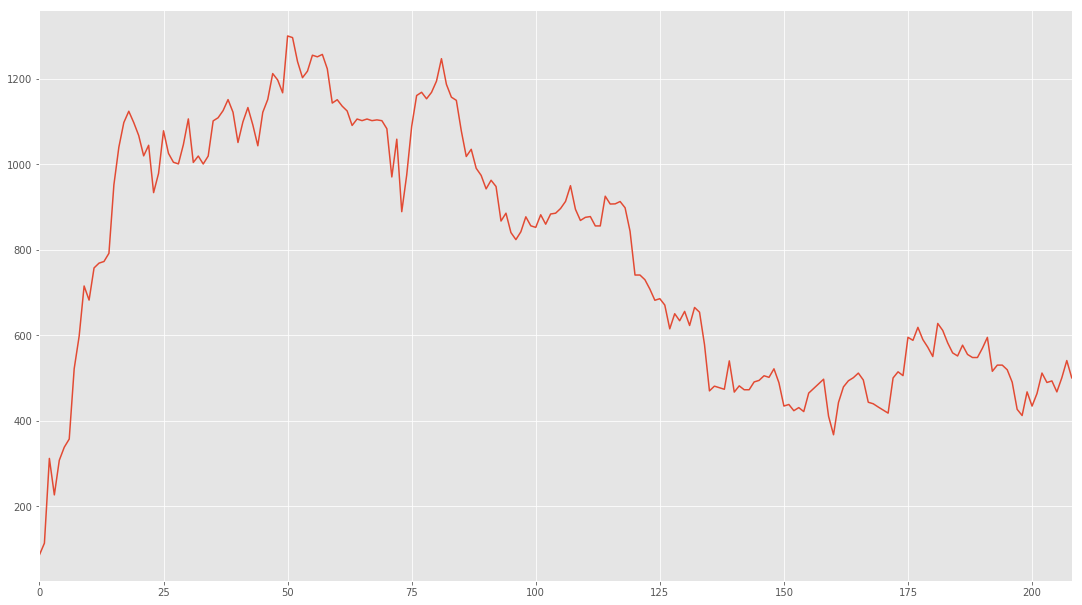

In [53]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
returns = pd.DataFrame(daily_returns_list)
returns['cumulative'] = returns['pnl'].cumsum()
returns['cumulative'].plot()

### Executions

In [225]:
executions = pd.DataFrame(execution_list)
execution['abs_shares'] = abs(executions['Quantity'])
executions

,Date,Price,Quantity,Symbol
0,2018-04-02 15:13:00,256.1700,390,SPY
1,2018-04-02 15:55:00,257.5790,-390,SPY
2,2018-04-02 15:59:00,257.5300,388,SPY
3,2018-04-02 16:00:00,257.3100,-388,SPY
4,2018-04-03 14:09:00,258.7100,-386,SPY
5,2018-04-03 15:59:00,260.7700,386,SPY
6,2018-04-04 14:11:00,261.0800,383,SPY
7,2018-04-04 14:12:00,261.1650,-383,SPY
8,2018-04-04 15:21:00,263.0300,380,SPY
9,2018-04-04 15:27:00,263.5000,-380,SPY


# Examine sBuy sSell Range 

C:\Users\b.karjoo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  """


{'boxes': [<matplotlib.lines.Line2D at 0x18c752b0>],
 'caps': [<matplotlib.lines.Line2D at 0x18c75940>,
 'fliers': [<matplotlib.lines.Line2D at 0x18c80358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18c75fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18c75358>,
  <matplotlib.lines.Line2D at 0x18c755f8>]}

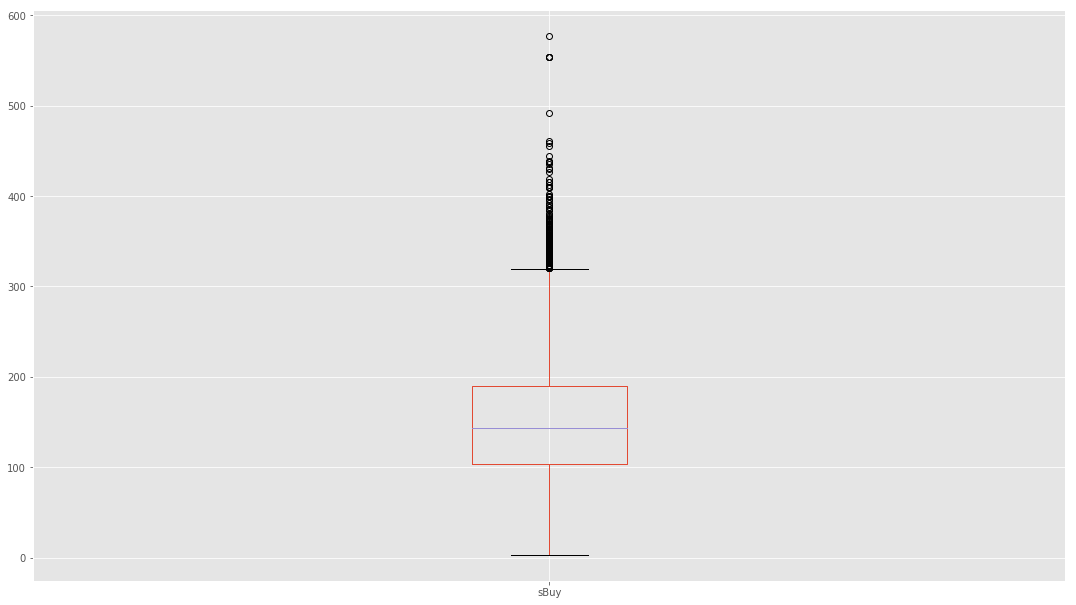

In [54]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
merged_dfs.boxplot(column='sBuy')

C:\Users\b.karjoo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  This is separate from the ipykernel package so we can avoid doing imports until


{'boxes': [<matplotlib.lines.Line2D at 0x18dc2240>],
 'caps': [<matplotlib.lines.Line2D at 0x18dc28d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18dce2e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18dc2f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x18dc22e8>,
  <matplotlib.lines.Line2D at 0x18dc2588>]}

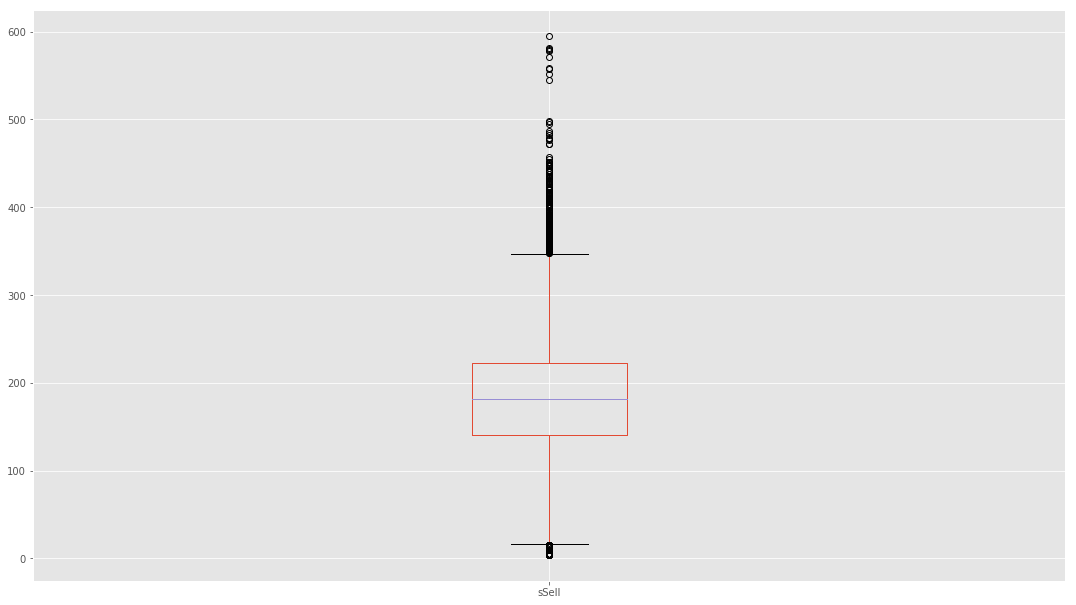

In [55]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
merged_dfs.boxplot(column='sSell')